# Problem Statement


Develop a predictive model to classify individuals as either at risk or not at risk for heart disease based on their clinical and demographic data. The goal is to analyze key health metrics and use them to accurately predict heart disease risk.


In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix



Objective Summary:

The Heart Disease dataset contains various medical attributes related to patients that can help predict the presence of heart disease. These attributes include features such as age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, ST depression induced by exercise, slope of the peak exercise ST segment, number of major vessels colored by fluoroscopy, and thalassemia.

Target:

The target variable in the dataset is typically labeled as "target," and it indicates the presence or absence of heart disease. The target variable values are:

In [3]:

df = pd.read_csv('heart.csv')
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# provides a summary of the dataset including data types and non-null count

In [4]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Descriptive Statistics


In [5]:

df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:

df.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [7]:

df.drop_duplicates(inplace = True)


In [8]:

df.duplicated().sum()


0


# Data Visualization
Create histograms for all numerical columns to understand the distributia.

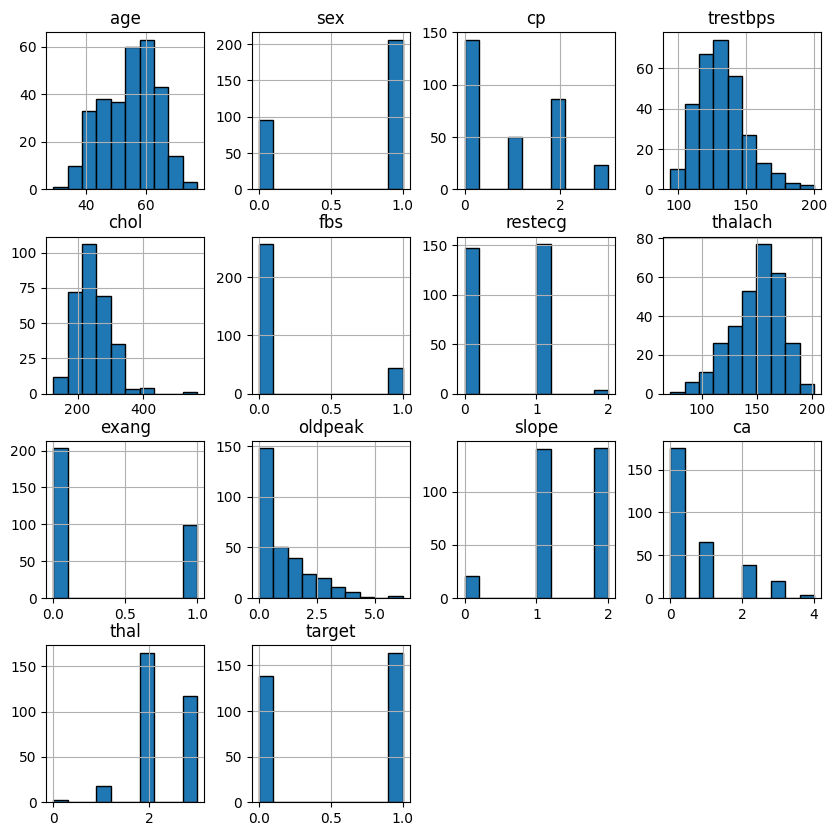

In [9]:

df.hist(edgecolor = 'k', figsize = (10, 10))

plt.show()


# Correlation Analysis
A heatmap was generated to understand the correlation between different features:


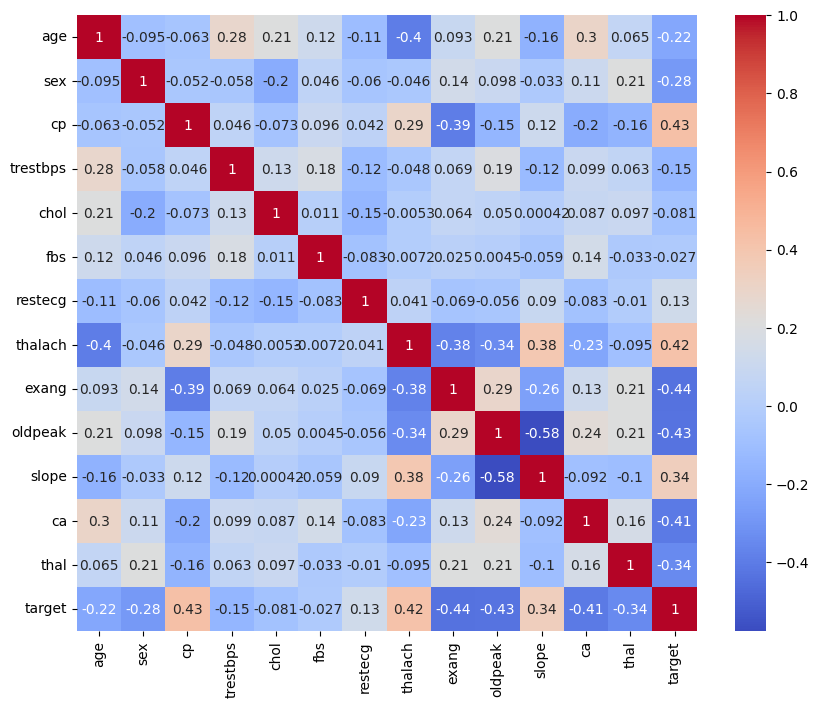

In [10]:

x = df.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(x, annot = True, cmap = 'coolwarm')

plt.show()


# Feature selection
Low-correlation features and those with high skewness were dropped from the dataset:


In [11]:

df.drop(columns = ['age'], inplace = True, axis = 1)
df.drop(columns = ['sex'], inplace = True, axis = 1)
df.drop(columns = ['trestbps'], inplace = True, axis = 1)
df.drop(columns = ['chol'], inplace = True, axis = 1)
df.drop(columns = ['fbs'], inplace = True, axis = 1)
df.drop(columns = ['restecg'], inplace = True, axis = 1)


In [12]:

df.shape


(302, 8)

In [13]:

df.columns


Index(['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'], dtype='object')

# Plot Correlation Heatmap

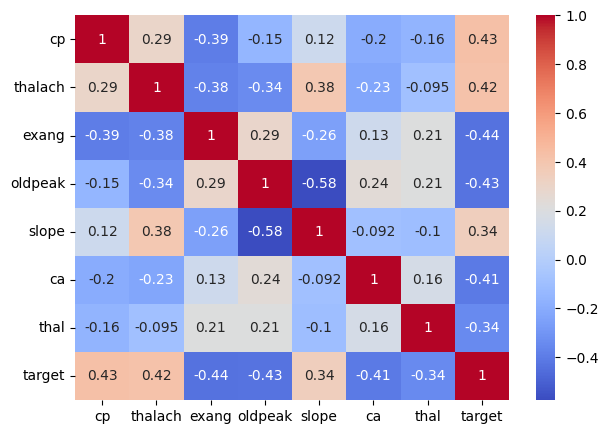

In [14]:

x = df.corr()
plt.figure(figsize = (7, 5))
sns.heatmap(x, annot = True, cmap = 'coolwarm')

plt.show()


In [15]:

cor = df.corr()['target']#finding correlatiom
cor.sort_values(ascending = False)


,target
target,1.000000
cp,0.432080
thalach,0.419955
slope,0.343940
thal,-0.343101
ca,-0.408992
oldpeak,-0.429146
exang,-0.435601


# Log Transformation of Data

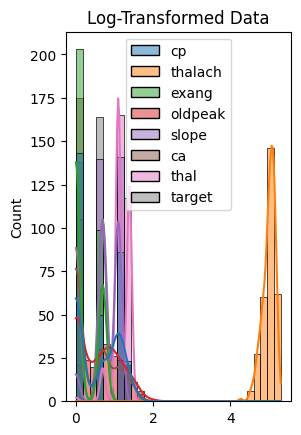

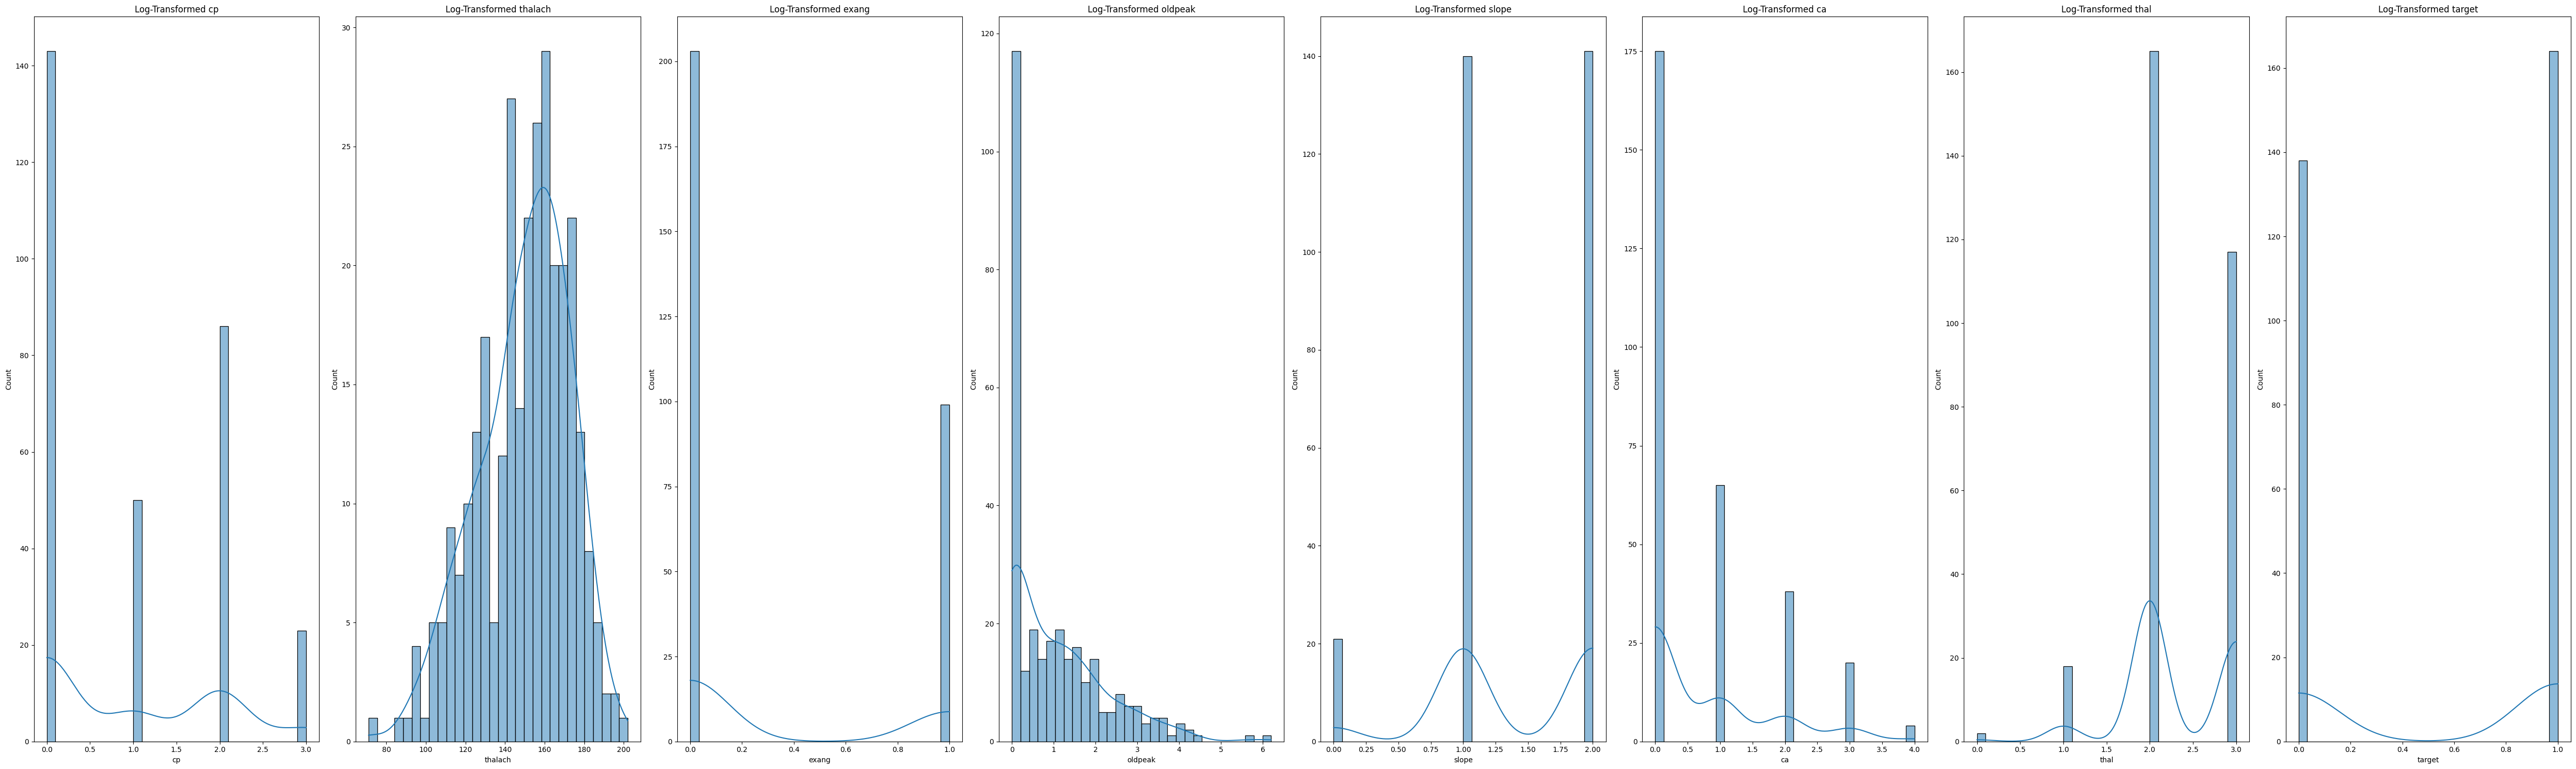

In [16]:

data=np.log(df+1)

# Plotting log-transformed data distribution
plt.subplot(1,2,2)
sns.histplot(data, bins=30, kde=True)
plt.title("Log-Transformed Data")
plt.show()

# Assuming df is a DataFrame with multiple features
num_features = df.shape[1]  # Number of features
plt.figure(figsize=(50, 15))  # Adjust the figure size as needed

for i, column in enumerate(df.columns, 1):
    plt.subplot(1, num_features, i)  # Adjust layout for each feature
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f"Log-Transformed {column}")

plt.tight_layout()
plt.show()


# Feature and Target Selection
Features were selected for modeling


In [17]:

data['target'] = (data['target'] > 0.5).astype(int)
x=data[['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y=data['target']


In [18]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# Now perform the train-test split

In [19]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)



# Model Training


In [20]:

model=RandomForestClassifier()
model.fit(x_train,y_train)


RandomForestClassifier()

# Predictions
The model was used to predict target based on user inputs for pollutant levels



In [21]:

y_pred=model.predict(x_test)
y_pred


array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [22]:

from sklearn.metrics import precision_score,recall_score, f1_score, accuracy_score


In [23]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="weighted"))

print('Recall:', recall_score(y_test, y_pred, average="weighted"))

print('F1 Score:', f1_score(y_test, y_pred, average="weighted"))


Accuracy: 0.8524590163934426
Precision: 0.8565927077444884
Recall: 0.8524590163934426
F1 Score: 0.8524590163934426


In [24]:
df.head()

,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,0,168,0,1.0,2,2,3,0
1,0,155,1,3.1,0,0,3,0
2,0,125,1,2.6,0,0,3,0
3,0,161,0,0.0,2,1,3,0
4,0,106,0,1.9,1,3,2,0


In [25]:

cp      = float(input("Enter cp : "))
thalach = float(input("Enter thalach : "))
exang   = float(input("Enter exang : "))
oldpeak = float(input("Enter oldpeak : "))
slope   = float(input("Enter slope : "))
ca      = float(input("Enter ca : "))
thal    = float(input("Enter thal : "))

user_input=[[cp,thalach,exang,oldpeak,slope,ca,thal]]
heart=model.predict(user_input)
print("heart: ",heart)


Enter cp : 0
Enter thalach : 168
Enter exang : 0
Enter oldpeak : 1.0
Enter slope : 2
Enter ca : 2
Enter thal : 3
heart:  [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
